### 使用梯度上升法秋节主成分


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0., 100., size=100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 10., size=100)

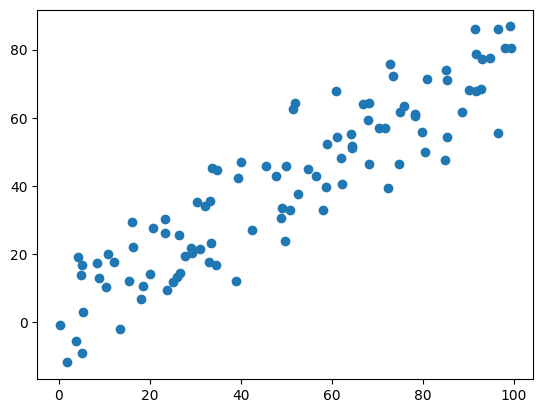

In [7]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

### demean

In [10]:
def demean(X):
    return X - np.mean(X, axis=0)

In [11]:
X_demean = demean(X)

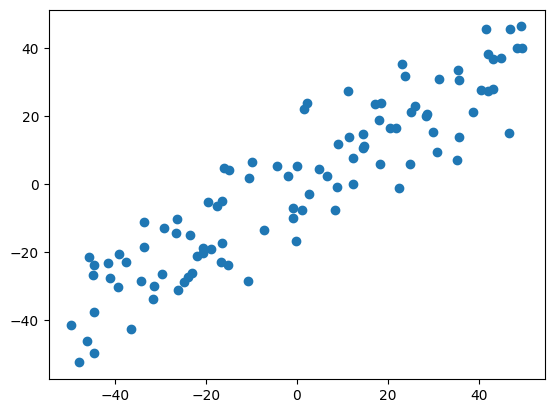

In [13]:
plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.show()

In [14]:
np.mean(X_demean[:, 0])

-2.9132252166164106e-15

In [15]:
np.mean(X_demean[:, 1])

2.9132252166164106e-15

### 梯度上升法

In [16]:
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

In [17]:
def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

In [35]:
def df_debug(w, X, epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X)) / (2*epsilon)
    return res

In [38]:
def direction(w):
    return w / np.linalg.norm(w)

def gradient_descent(df, X, initial_w, eta, n_iters=1e4, epsilon=1e-8):

    w = direction(initial_w)
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w) # 注意1： 每次求一个单位方向
        if (abs(f(w, X) - f(last_w, X)) < epsilon):
            break

        cur_iter += 1
    return w

In [24]:
initial_w = np.random.random(X.shape[1]) # 注意2： 不能用0向量开始
initial_w

array([0.56410137, 0.30281799])

In [25]:
eta = 0.01

In [26]:
# 注意3 ：不能使用StandardScaler标准化数据

In [39]:
gradient_descent(df_debug, X_demean, initial_w, eta)

array([0.77320908, 0.63415118])

In [42]:
w = gradient_descent(df_math, X_demean, initial_w, eta)

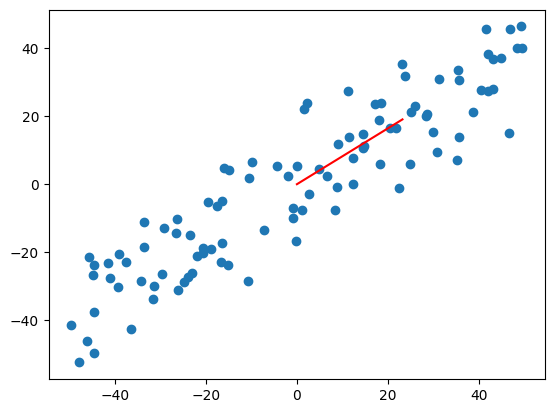

In [43]:
plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.plot([0, w[0]*30], [0, w[1]*30], color='r')

In [50]:
X2 = np.empty((100, 2))
X2[:, 0] = np.random.uniform(0., 100., size=100)
X2[:, 1] = 0.75 * X2[:, 0] + 3.

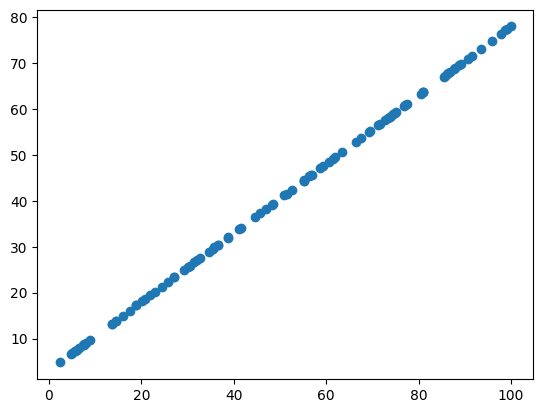

In [52]:
plt.scatter(X2[:, 0], X2[:, 1])
plt.show()

In [53]:
X2_demean = demean(X2)

In [55]:
w2 = gradient_descent(df_math, X2_demean, initial_w, eta)

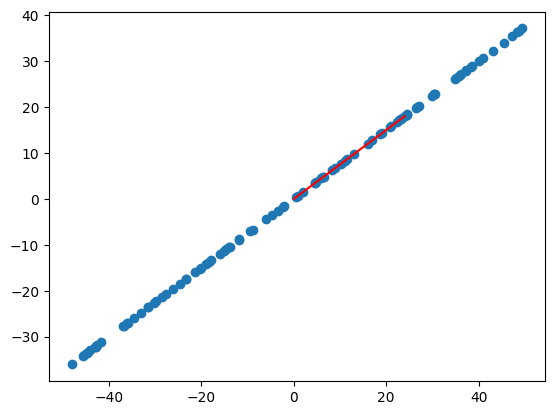

In [56]:
plt.scatter(X2_demean[:, 0], X2_demean[:, 1])
plt.plot([0, w2[0]*30], [0, w2[1]*30], color='r')